In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employees = pd.read_csv('employees.csv')
titles = pd.read_csv('titles.csv')
departments = pd.read_csv('departments.csv')
dept_emp = pd.read_csv('dept_emp.csv')
salaries = pd.read_csv('salaries.csv')
dept_manager = pd.read_csv('dept_manager.csv')

In [4]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,1,1977-06-14,Geert,Vanderkelen,M,2018-04-22
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26
2,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
3,10003,1959-12-03,Parto,Bamford,M,1986-08-28
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
...,...,...,...,...,...,...
395,10395,1952-02-17,Takahiro,Deverell,M,1987-02-04
396,10396,1955-08-21,Sibyl,Rahier,M,1986-01-11
397,10397,1955-11-11,Irena,Reutenauer,M,1993-05-21
398,10398,1958-07-16,Shooichi,Escriba,F,1990-10-12


In [5]:
# List of DataFrames and their names
dataframes = [
    (employees, "employees"),
    (titles, "titles"),
    (departments, "departments"),
    (dept_emp, "dept_emp"),
    (salaries, "salaries"),
    (dept_manager, "dept_manager"),
]

# Perform EDA using a for loop
for df, name in dataframes:
    print(f"----- {name} -----")
    
    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Summary statistics for numerical columns
    print("\nSummary Statistics:")
    print(df.describe())
    
    print("\n")


----- employees -----

Missing Values:
emp_no        0
birth_date    0
first_name    0
last_name     0
gender        0
hire_date     0
dtype: int64

Summary Statistics:
             emp_no
count    400.000000
mean   10174.502500
std      522.796011
min        1.000000
25%    10099.750000
50%    10199.500000
75%    10299.250000
max    10399.000000


----- titles -----

Missing Values:
emp_no       0
title        0
from_date    0
to_date      0
dtype: int64

Summary Statistics:
             emp_no
count    400.000000
mean   10135.172500
std       77.984946
min    10001.000000
25%    10066.000000
50%    10135.500000
75%    10202.250000
max    10269.000000


----- departments -----

Missing Values:
dept_no      0
dept_name    0
dtype: int64

Summary Statistics:
       dept_no  dept_name
count        9          9
unique       9          9
top       d007  Marketing
freq         1          1


----- dept_emp -----

Missing Values:
emp_no       0
dept_no      0
from_date    0
to_date      0
dt

In [6]:
# Investigate the distribution of numerical variables
print(salaries['salary'].describe())

count      400.000000
mean     61404.570000
std      14506.587686
min      39520.000000
25%      50092.750000
50%      59727.500000
75%      71115.000000
max      99651.000000
Name: salary, dtype: float64


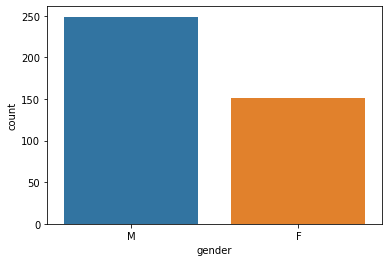

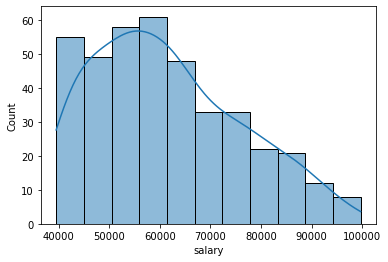

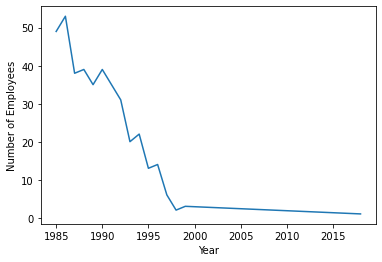

In [7]:
# Bar plot for employee gender distribution
sns.countplot(x='gender', data=employees)
plt.show()

# Histogram for salary distribution
sns.histplot(salaries['salary'], kde=True)
plt.show()

# Line chart for employees hired over time
employees['hire_year'] = pd.to_datetime(employees['hire_date']).dt.year
employees_by_year = employees.groupby('hire_year').size()
employees_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.show()

In [9]:
import datetime

# Merge tables
emp_salaries = pd.merge(employees, salaries, on='emp_no')
emp_dept = pd.merge(emp_salaries, dept_emp, on='emp_no')
emp_dept_titles = pd.merge(emp_dept, titles, on='emp_no')
full_data = pd.merge(emp_dept_titles, departments, on='dept_no')

# Replace '9999-01-01' in the 'to_date' column with the current date
current_date = datetime.date.today()
full_data['to_date'] = full_data['to_date'].apply(lambda x: current_date if x == '9999-01-01' else x)

# Calculate tenure in days
full_data['tenure_in_days'] = (pd.to_datetime(full_data['to_date']) - pd.to_datetime(full_data['hire_date'])).dt.days

full_data

,emp_no,birth_date,first_name,last_name,gender,hire_date,hire_year,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,title,from_date,to_date,dept_name,tenure_in_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,60117,1986-06-26,1987-06-26,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,62102,1987-06-26,1988-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66074,1988-06-25,1989-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66596,1989-06-25,1990-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66961,1990-06-25,1991-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,96122,2000-08-01,2001-08-01,d001,1993-08-03,9999-01-01,Staff,1993-08-03,2000-08-03,Marketing,2557
726,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,98522,2001-08-01,2002-08-01,d001,1993-08-03,9999-01-01,Senior Staff,2000-08-03,2023-04-17,Marketing,10849
727,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,98522,2001-08-01,2002-08-01,d001,1993-08-03,9999-01-01,Staff,1993-08-03,2000-08-03,Marketing,2557
728,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,99651,2002-08-01,9999-01-01,d001,1993-08-03,9999-01-01,Senior Staff,2000-08-03,2023-04-17,Marketing,10849


In [10]:
# Merge the dept_manager table with the full_data table
full_data_with_managers = pd.merge(full_data, dept_manager, how='left', on=['emp_no', 'dept_no'], suffixes=('', '_manager'))

# Calculate the difference (in days) between hire_date and from_date_manager
full_data_with_managers['promotion_time'] = (pd.to_datetime(full_data_with_managers['from_date_manager']) - pd.to_datetime(full_data_with_managers['hire_date'])).dt.days

# Create the promoted_next_year binary column
full_data_with_managers['promoted_next_year'] = full_data_with_managers['promotion_time'].apply(lambda x: 1 if 0 <= x <= 365 else 0)

# Drop unnecessary columns
full_data_with_managers.drop(columns=['from_date_manager', 'to_date_manager', 'promotion_time'], inplace=True)

full_data_with_managers

,emp_no,birth_date,first_name,last_name,gender,hire_date,hire_year,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,title,from_date,to_date,dept_name,tenure_in_days,promoted_next_year
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,60117,1986-06-26,1987-06-26,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444,0
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,62102,1987-06-26,1988-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444,0
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66074,1988-06-25,1989-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444,0
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66596,1989-06-25,1990-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444,0
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1986,66961,1990-06-25,1991-06-25,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,2023-04-17,Development,13444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,96122,2000-08-01,2001-08-01,d001,1993-08-03,9999-01-01,Staff,1993-08-03,2000-08-03,Marketing,2557,0
726,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,98522,2001-08-01,2002-08-01,d001,1993-08-03,9999-01-01,Senior Staff,2000-08-03,2023-04-17,Marketing,10849,0
727,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,98522,2001-08-01,2002-08-01,d001,1993-08-03,9999-01-01,Staff,1993-08-03,2000-08-03,Marketing,2557,0
728,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993,99651,2002-08-01,9999-01-01,d001,1993-08-03,9999-01-01,Senior Staff,2000-08-03,2023-04-17,Marketing,10849,0


In [13]:
# Display the head of the DataFrame
print("----- Head of the DataFrame -----")
print(full_data_with_managers.head())

# Check for missing values
print("\n----- Missing Values -----")
print(full_data_with_managers.isnull().sum())

# Summary statistics for numerical columns
print("\n----- Summary Statistics -----")
print(full_data_with_managers.describe())

# Unique values for categorical columns
print("\n----- Unique Values for Categorical Columns -----")
print("Genders:", full_data_with_managers['gender'].unique())
print("Departments:", full_data_with_managers['dept_name'].unique())
print("Titles:", full_data_with_managers['title'].unique())

----- Head of the DataFrame -----
   emp_no  birth_date first_name last_name gender   hire_date  hire_year  \
0   10001  1953-09-02     Georgi   Facello      M  1986-06-26       1986   
1   10001  1953-09-02     Georgi   Facello      M  1986-06-26       1986   
2   10001  1953-09-02     Georgi   Facello      M  1986-06-26       1986   
3   10001  1953-09-02     Georgi   Facello      M  1986-06-26       1986   
4   10001  1953-09-02     Georgi   Facello      M  1986-06-26       1986   

   salary from_date_x   to_date_x dept_no from_date_y   to_date_y  \
0   60117  1986-06-26  1987-06-26    d005  1986-06-26  9999-01-01   
1   62102  1987-06-26  1988-06-25    d005  1986-06-26  9999-01-01   
2   66074  1988-06-25  1989-06-25    d005  1986-06-26  9999-01-01   
3   66596  1989-06-25  1990-06-25    d005  1986-06-26  9999-01-01   
4   66961  1990-06-25  1991-06-25    d005  1986-06-26  9999-01-01   

             title   from_date     to_date    dept_name  tenure_in_days  \
0  Senior Engineer 


----- Gender Distribution -----
M    413
F    317
Name: gender, dtype: int64


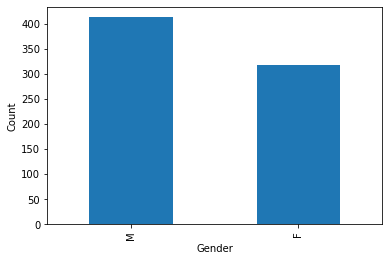


----- Department Distribution -----
Development           214
Production            197
Quality Management     89
Human Resources        84
Research               53
Sales                  40
Customer Service       33
Marketing              20
Name: dept_name, dtype: int64


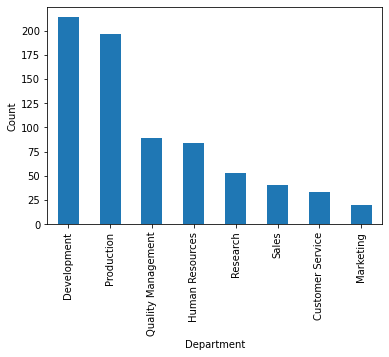


----- Title Distribution -----
Engineer              232
Senior Engineer       229
Senior Staff          106
Staff                 104
Technique Leader       33
Assistant Engineer     26
Name: title, dtype: int64


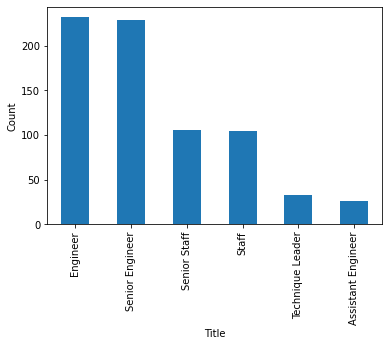


----- Promotion Distribution -----
0    730
Name: promoted_next_year, dtype: int64


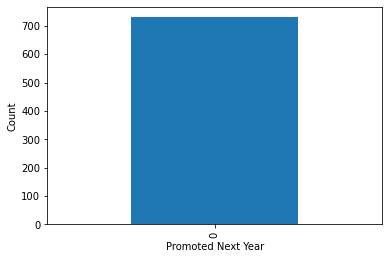


----- Salary Distribution -----


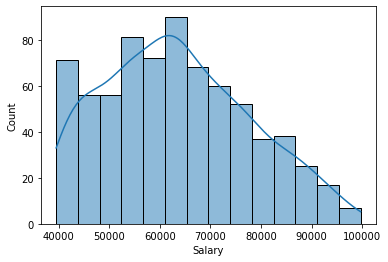

In [16]:
# Distribution of genders
print("\n----- Gender Distribution -----")
gender_counts = full_data_with_managers['gender'].value_counts()
print(gender_counts)
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of departments
print("\n----- Department Distribution -----")
dept_counts = full_data_with_managers['dept_name'].value_counts()
print(dept_counts)
dept_counts.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Distribution of titles
print("\n----- Title Distribution -----")
title_counts = full_data_with_managers['title'].value_counts()
print(title_counts)
title_counts.plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

# Distribution of promoted_next_year
print("\n----- Promotion Distribution -----")
promotion_counts = full_data_with_managers['promoted_next_year'].value_counts()
print(promotion_counts)
promotion_counts.plot(kind='bar')
plt.xlabel('Promoted Next Year')
plt.ylabel('Count')
plt.show()

# Distribution of salaries
print("\n----- Salary Distribution -----")
sns.histplot(data=full_data_with_managers, x='salary', kde=True)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for modeling (select relevant features and target variable)
X = full_data_with_managers[['salary', 'gender', 'hire_date']]  # Assuming these are the features used for prediction
y = full_data_with_managers['promoted_next_year']  # Assuming 'promoted_next_year' column is available

# Convert categorical variables to numerical variables
X = pd.get_dummies(X, columns=['gender'], drop_first=True)

# Convert 'hire_date' to numerical values (days since hire_date)
X['hire_date'] = (pd.to_datetime(current_date) - pd.to_datetime(X['hire_date'])).dt.days

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Predict promotions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

